In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('images/dog.jpg')

#### Image Translation

In [3]:
cv2.imshow("My Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
quarter_width, quarter_height = img.shape[1] // 4, img.shape[0] // 4

In [6]:
# define translation matrix
T = np.float32([[1,0,quarter_width],[0,1,quarter_height]])

In [7]:
T

array([[  1.,   0., 100.],
       [  0.,   1., 100.]], dtype=float32)

In [8]:
translated_img = cv2.warpAffine(img,T, (img.shape[1], img.shape[0]))

In [9]:
cv2.imshow("Translated Image", translated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
translated_img = cv2.warpAffine(img,T, (600, 600))
cv2.imshow("Translated Image", translated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
T = np.float32([[1,0,150],[0,1,75]])
translated_img = cv2.warpAffine(img,T, (img.shape[1], img.shape[0]))
cv2.imshow("Translated Image", translated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
T = np.float32([[1,0,-100],[0,1,-75]])
translated_img = cv2.warpAffine(img,T, (600,600))
cv2.imshow("Translated Image", translated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Image Rotation

In [18]:
img_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
img_90a = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
img_180 = cv2.rotate(img, cv2.ROTATE_180)

In [19]:
cv2.imshow("90 Clockwise", img_90)
cv2.imshow("90 Anti-Clockwise", img_90a)
cv2.imshow("180", img_180)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
center = img.shape[1] // 2, img.shape[0] // 2

In [21]:
center

(200, 200)

In [22]:
angle = 30 

In [23]:
R = cv2.getRotationMatrix2D(center, angle, 1.0)

In [24]:
rotated_img = cv2.warpAffine(img, R, (400, 400))

In [25]:
cv2.imshow("Rotated Image", rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
R = cv2.getRotationMatrix2D((300,300), -60, 1.0)
rotated_img = cv2.warpAffine(img, R, (600, 600))
cv2.imshow("Rotated Image", rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
mask = np.all(rotated_img == [0,0,0], axis = -1)
rotated_img[mask] = [255,255,255]
cv2.imshow("Rotated Image", rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
x = np.array([56,33,12,4,5,66,35])

In [39]:
mask = x > 40

In [40]:
mask

array([ True, False, False, False, False,  True, False])

In [42]:
x[mask] = 100

In [43]:
x

array([100,  33,  12,   4,   5, 100,  35])

#### Image Resizing

In [45]:
img_new = cv2.resize(img, (500, 500))

In [47]:
img_new.shape

(500, 500, 3)

In [46]:
cv2.imshow("Resized Image", img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
img_new = cv2.resize(img, (700, 500))
cv2.imshow("Resized Image", img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Image rescaling

In [50]:
img_new = cv2.resize(img, None, fx = 1.5, fy=1.5)
cv2.imshow("Resized Image", img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Transformation using PIL

In [52]:
from PIL import Image

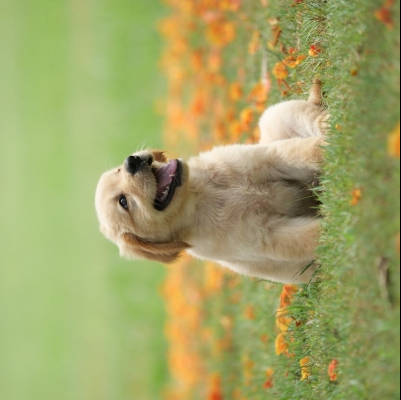

In [53]:
img_pil = Image.open('images/dog.jpg')
img_pil.rotate(90)

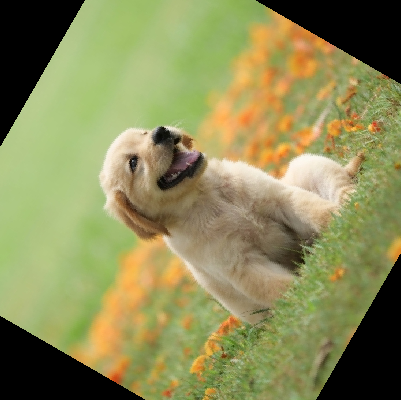

In [54]:
img_pil.rotate(60)

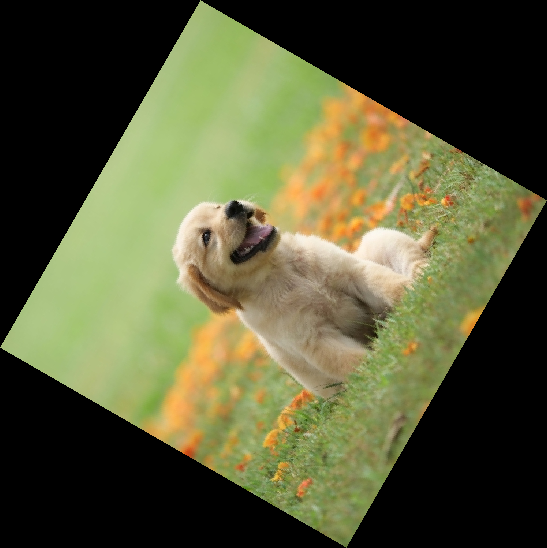

In [55]:
img_pil.rotate(60, expand=True) 

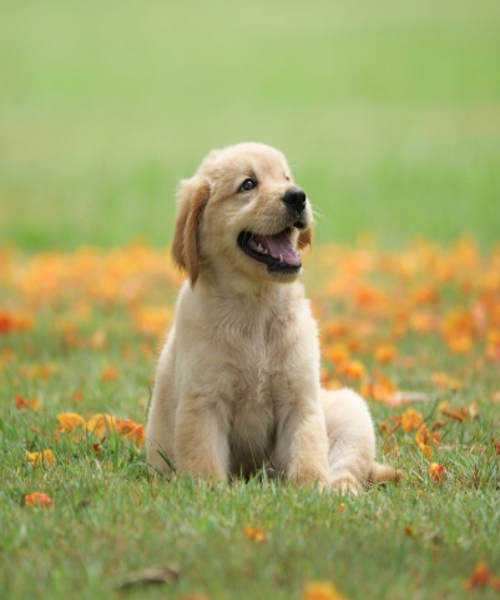

In [56]:
img_pil.resize((500, 600))

#### Image Resizing using scikit-image

In [58]:
from skimage.transform import resize

In [59]:
img_rgb = plt.imread('images/dog.jpg')

In [60]:
img_res = resize(img_rgb, (500, 600))

In [61]:
img_res.shape

(500, 600, 3)

Text(0.5, 1.0, 'Resized')

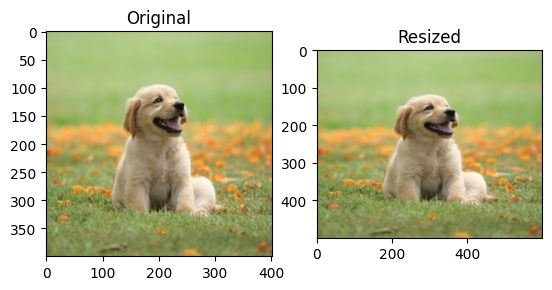

In [62]:
plt.subplot(121)
plt.imshow(img_rgb); plt.title('Original')
plt.subplot(122)
plt.imshow(img_res); plt.title('Resized')

#### Image flip

In [64]:
new_img = np.flip(img_rgb)

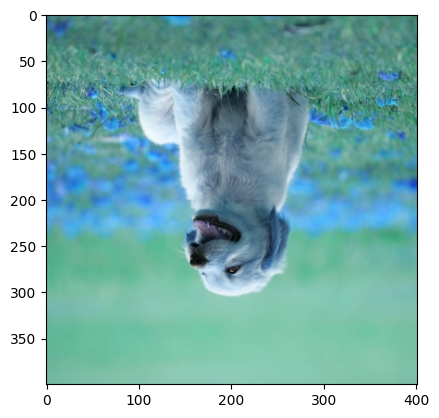

In [65]:
plt.imshow(new_img)

In [66]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [72]:
# Horizontal flip 
img_hor = cv2.flip(img_rgb, 0)

# Vertical flip 
img_ver = cv2.flip(img_rgb, 1)

# Diagonal flip 
img_dia = cv2.flip(img_rgb, -1)

Text(0.5, 1.0, 'Diagonal')

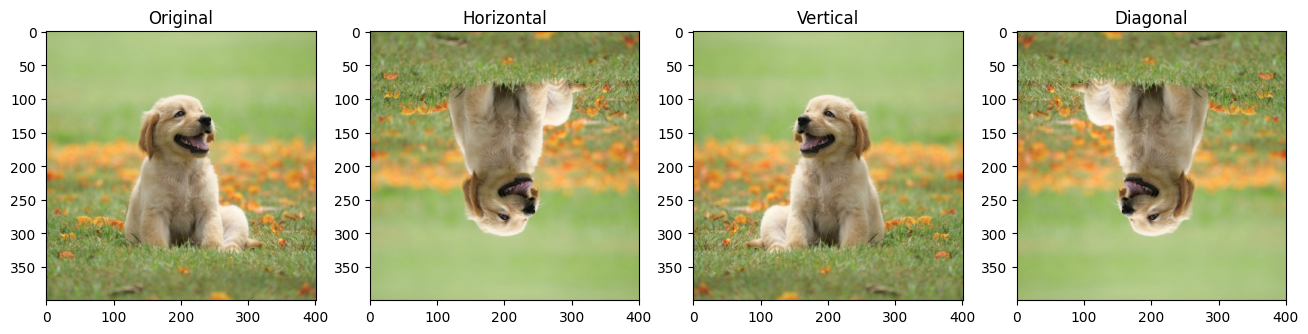

In [73]:
plt.figure(figsize=(16,9))
plt.subplot(141)
plt.imshow(img_rgb); plt.title('Original')
plt.subplot(142)
plt.imshow(img_hor); plt.title('Horizontal')
plt.subplot(143)
plt.imshow(img_ver); plt.title('Vertical')
plt.subplot(144)
plt.imshow(img_dia); plt.title('Diagonal')

In [74]:
x = np.array([[4,5,7],[6,7,9]])
y = np.array([[0,2,1],[9,5,2]])

In [75]:
np.hstack([x, y])

array([[4, 5, 7, 0, 2, 1],
       [6, 7, 9, 9, 5, 2]])

In [76]:
np.vstack([x, y])

array([[4, 5, 7],
       [6, 7, 9],
       [0, 2, 1],
       [9, 5, 2]])

In [79]:
img_sta = np.hstack([img_rgb, img_ver])

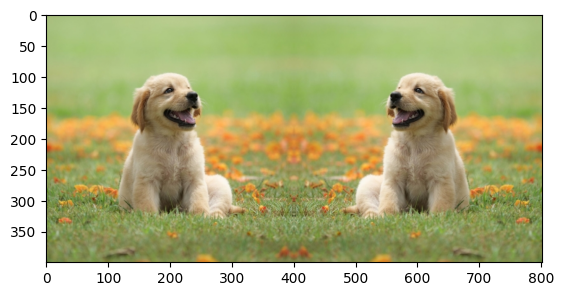

In [80]:
plt.imshow(img_sta)

#### Image Cropping

In [83]:
height, width = img_rgb.shape[0], img_rgb.shape[0]

In [84]:
startRow = int(height*0.15)
startCol = int(width*0.15)
endRow = int(height*0.85)
endCol = int(width*0.85)

In [87]:
croppedImg = img_rgb[startRow:endRow, startCol:endCol]

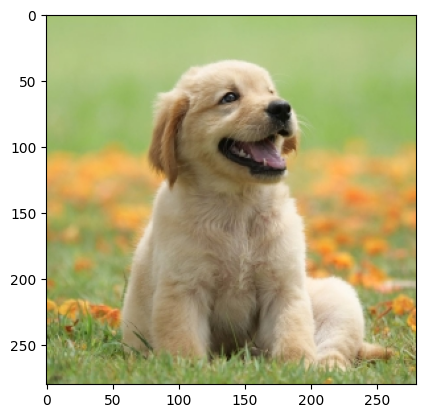

In [88]:
plt.imshow(croppedImg)

In [89]:
croppedImg.shape

(280, 280, 3)